In [20]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import nn_vis
import matplotlib.pyplot as plt
from torchviz import make_dot
from IPython.display import Image, display

# Model Definition


In [ ]:
class FeedForward(nn.Module):
    def __init__(self):
        super().__init__()
        # Layers
        self.layer1 = nn.Linear(1, 10)
        self.layer2 = nn.Linear(10, 10)
        self.layer3 = nn.Linear(10, 1)

    def forward(self, x):
        # Forward pass, layer by layer
        x = self.layer1(x)
        x = torch.tanh(x)
        x = self.layer2(x)
        x = torch.tanh(x)
        x = self.layer3(x)
        return x

In [34]:
# Create a model instance
model = FeedForward()

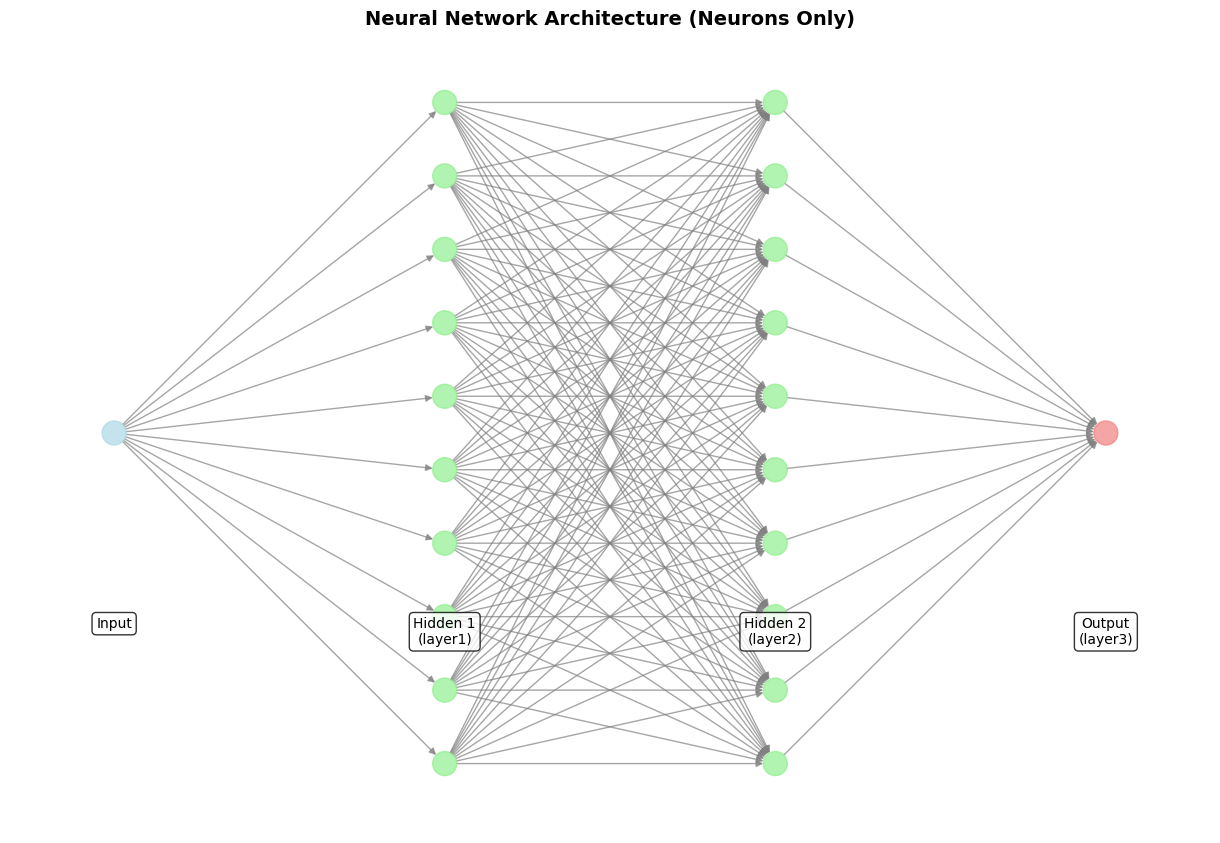

In [24]:
nn_vis.visualize_neural_network(model)

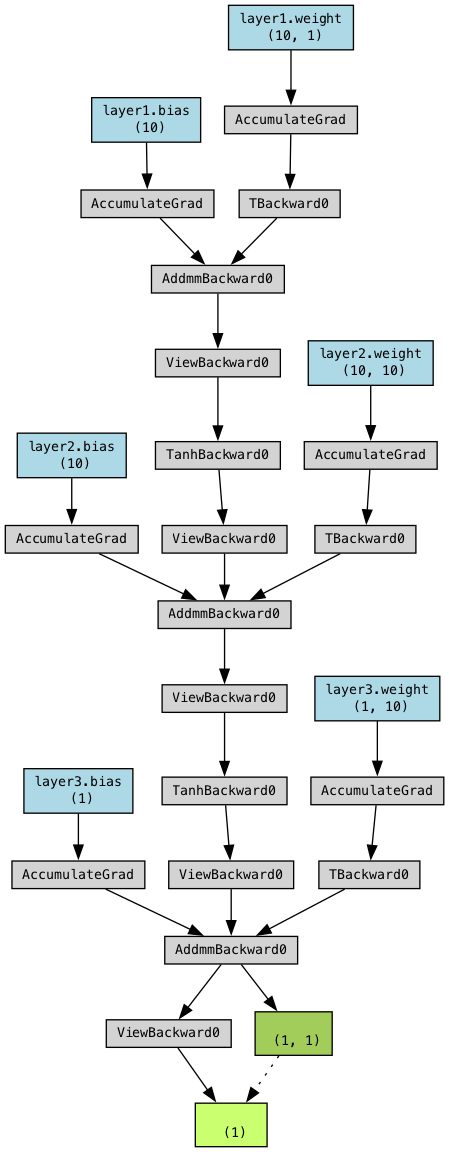

In [25]:
def display_model(model):
    sample_input = torch.randn(1)
    output = model(sample_input)
    dot = make_dot(output, params=dict(model.named_parameters()))
    dot.render("simple_ffn_graph", format="png")
    display(Image(filename="simple_ffn_graph.png"))


display_model(model)

# Sampling a Function


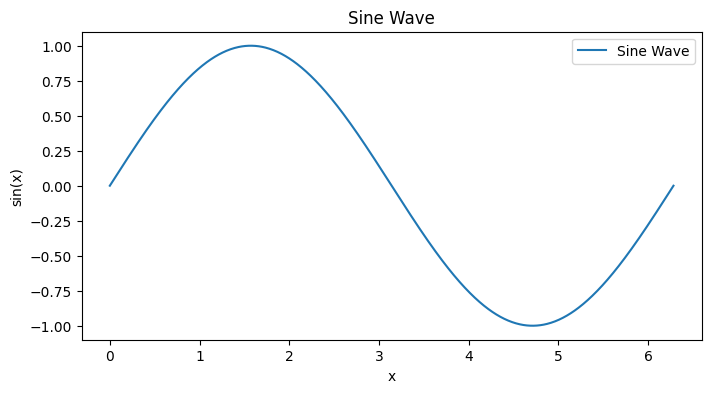

In [26]:
# Generate sine wave data
x = np.linspace(0, 2 * np.pi, 1000)
y = np.sin(x)

# Display the sine wave
plt.figure(figsize=(8, 4))
plt.plot(x, y, label="Sine Wave")
plt.title("Sine Wave")
plt.xlabel("x")
plt.ylabel("sin(x)")
plt.legend()
plt.show()

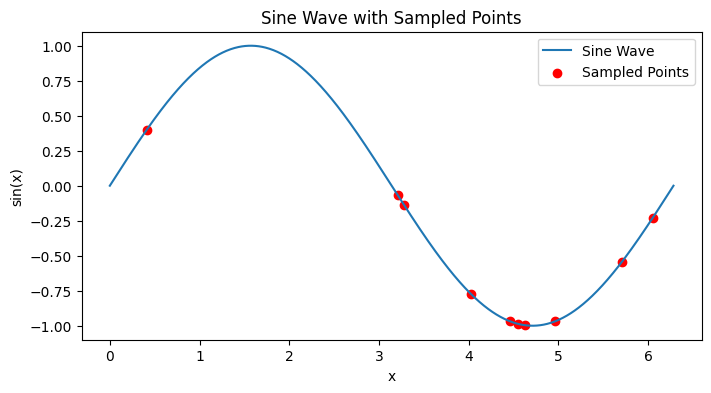

In [27]:
N_SAMPLES = 10

# Sample 100 points from the sine wave data
sample_indices = np.random.choice(len(x), size=N_SAMPLES, replace=False)
x_sample = x[sample_indices]
y_sample = y[sample_indices]

# Plot the sampled points on top of the sine wave
plt.figure(figsize=(8, 4))
plt.plot(x, y, label="Sine Wave")
plt.scatter(x_sample, y_sample, color="red", label="Sampled Points")
plt.title("Sine Wave with Sampled Points")
plt.xlabel("x")
plt.ylabel("sin(x)")
plt.legend()
plt.show()

In [28]:
# Convert sampled data to tensors
x_train = torch.tensor(x_sample, dtype=torch.float32).unsqueeze(1)
y_train = torch.tensor(y_sample, dtype=torch.float32).unsqueeze(1)

In [29]:
print(x_train)

tensor([[4.6228],
        [4.4592],
        [3.2076],
        [6.0505],
        [4.0253],
        [4.9624],
        [4.5473],
        [5.7046],
        [3.2831],
        [0.4088]])


In [30]:
print(y_train)

tensor([[-0.9960],
        [-0.9681],
        [-0.0660],
        [-0.2306],
        [-0.7731],
        [-0.9689],
        [-0.9864],
        [-0.5469],
        [-0.1410],
        [ 0.3975]])


# Training the Model


In [31]:
model = FeedForward()

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
EPOCHS = 700
losses = []

for epoch in range(EPOCHS):
    # Prep for next loop
    model.train()
    optimizer.zero_grad()

    # Compute predictions at sampled points
    outputs = model(x_train)

    # How far off are we?
    loss = criterion(outputs, y_train)

    # Correct weights
    loss.backward()
    optimizer.step()

    # Store losses for plotting
    losses.append(loss.item())

    print(f"Epoch {epoch + 1}/{EPOCHS}, Loss: {loss.item():.6f}")


Epoch 1/700, Loss: 0.182177
Epoch 2/700, Loss: 0.180447
Epoch 3/700, Loss: 0.178780
Epoch 4/700, Loss: 0.177164
Epoch 5/700, Loss: 0.175589
Epoch 6/700, Loss: 0.174050
Epoch 7/700, Loss: 0.172539
Epoch 8/700, Loss: 0.171055
Epoch 9/700, Loss: 0.169594
Epoch 10/700, Loss: 0.168155
Epoch 11/700, Loss: 0.166738
Epoch 12/700, Loss: 0.165341
Epoch 13/700, Loss: 0.163964
Epoch 14/700, Loss: 0.162608
Epoch 15/700, Loss: 0.161273
Epoch 16/700, Loss: 0.159959
Epoch 17/700, Loss: 0.158666
Epoch 18/700, Loss: 0.157393
Epoch 19/700, Loss: 0.156142
Epoch 20/700, Loss: 0.154910
Epoch 21/700, Loss: 0.153699
Epoch 22/700, Loss: 0.152507
Epoch 23/700, Loss: 0.151334
Epoch 24/700, Loss: 0.150180
Epoch 25/700, Loss: 0.149044
Epoch 26/700, Loss: 0.147926
Epoch 27/700, Loss: 0.146826
Epoch 28/700, Loss: 0.145744
Epoch 29/700, Loss: 0.144679
Epoch 30/700, Loss: 0.143632
Epoch 31/700, Loss: 0.142602
Epoch 32/700, Loss: 0.141589
Epoch 33/700, Loss: 0.140593
Epoch 34/700, Loss: 0.139615
Epoch 35/700, Loss: 0.1

# Reviewing Results


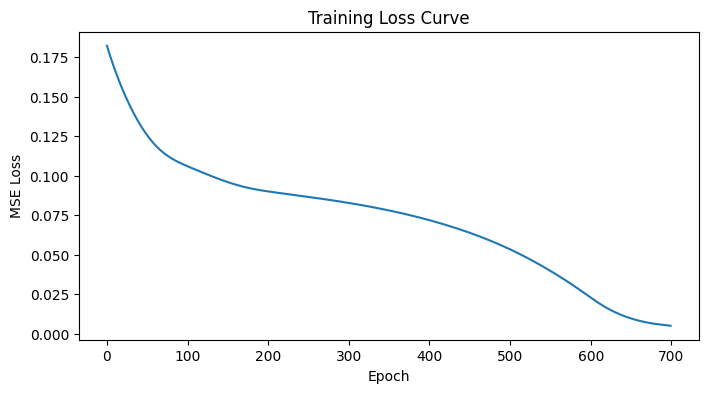

In [32]:
# Plot loss curve
plt.figure(figsize=(8, 4))
plt.plot(losses)
plt.title("Training Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.show()

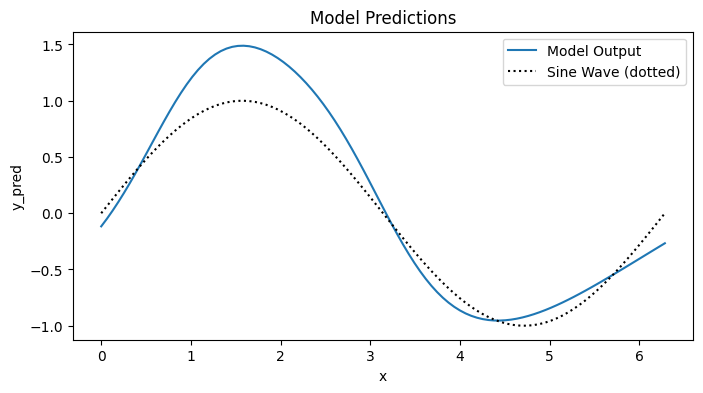

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Generate inputs from 0 to 2pi
x_test = np.linspace(0, 2 * np.pi, 100)
x_test_tensor = torch.tensor(x_test, dtype=torch.float32).unsqueeze(1)

# Get model predictions
model.eval()
with torch.no_grad():
    y_pred = model(x_test_tensor).squeeze().numpy()

# Display the model outputs with matplotlib and plot sine wave for comparison
plt.figure(figsize=(8, 4))
plt.plot(x_test, y_pred, label="Model Output")
plt.plot(x_test, np.sin(x_test), "k:", label="Sine Wave (dotted)")
plt.title("Model Predictions")
plt.xlabel("x")
plt.ylabel("y_pred")
plt.legend()
plt.show()